In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# data gathering 

In [2]:
df=pd.read_csv("online.csv")
df

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df['Area'].unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [5]:
df['Area']=df['Area'].replace('Dhaka',0).replace('Ctg',1).replace('Rangpur',2)

In [6]:
df['Area'].unique()

array([0, 1, 2], dtype=int64)

In [7]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

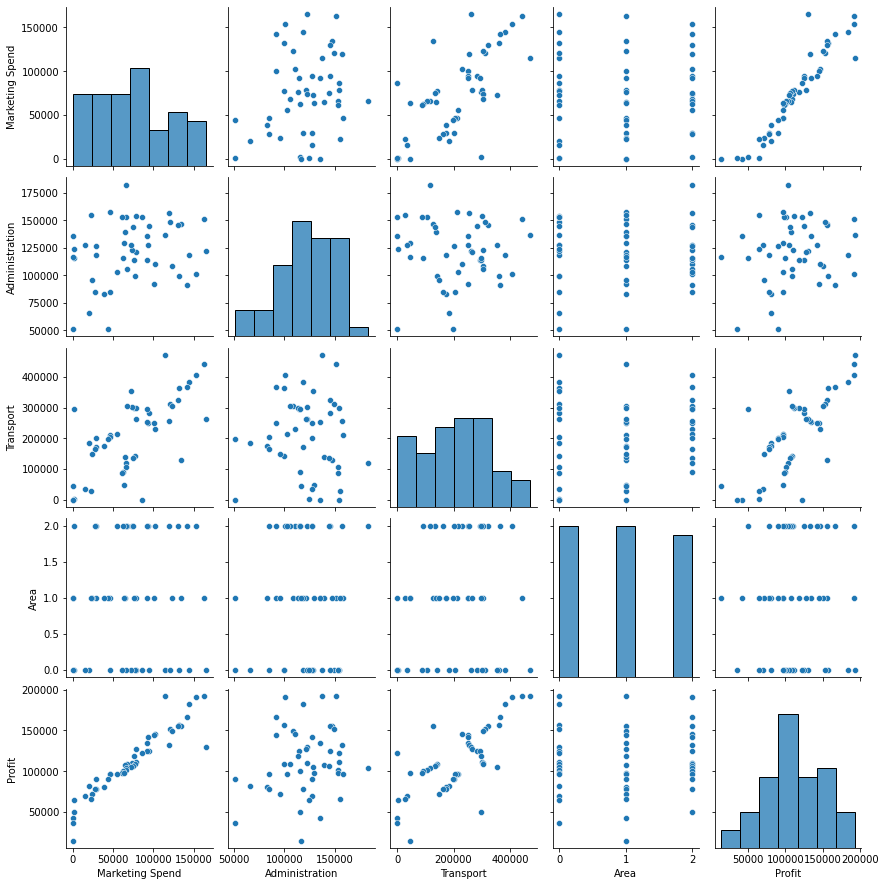

In [8]:
sns.pairplot(df)

C:\Users\HOME\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

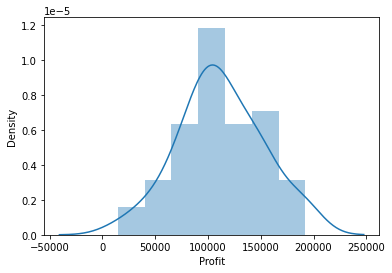

In [9]:
sns.distplot(df['Profit'])

In [10]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression


In [11]:
x=df.drop('Profit',axis=1)
y=df[['Profit']]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state =1)
linear_model = LinearRegression()

In [13]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred = linear_model.predict(x_test)

In [19]:
r2_value = r2_score(y_test,y_pred)
print('R squared Value is  :',r2_value)

print("MSE",mean_squared_error(y_test,y_pred))
print("model score :",linear_model.score(x_test,y_test))

R squared Value is  : 0.9330238486560525
MSE 151956988.67154709
model score : 0.9330238486560525


In [26]:
intercept = linear_model.intercept_
intercept

array([39979.56268579])

In [27]:
m=linear_model.coef_
m

array([[ 6.14642307e-01,  7.58607914e-02,  8.72147119e-02,
        -5.40665691e+02]])